In [191]:
# Necessary libs

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Traceback (most recent call last):
  File "_pydevd_bundle/pydevd_cython.pyx", line 1078, in _pydevd_bundle.pydevd_cython.PyDBFrame.trace_dispatch
  File "_pydevd_bundle/pydevd_cython.pyx", line 297, in _pydevd_bundle.pydevd_cython.PyDBFrame.do_wait_suspend
  File "/home/tako/learning/PhysLabV/.venv/lib/python3.8/site-packages/debugpy/_vendored/pydevd/pydevd.py", line 1976, in do_wait_suspend
    keep_suspended = self._do_wait_suspend(thread, frame, event, arg, suspend_type, from_this_thread, frames_tracker)
  File "/home/tako/learning/PhysLabV/.venv/lib/python3.8/site-packages/debugpy/_vendored/pydevd/pydevd.py", line 2011, in _do_wait_suspend
    time.sleep(0.01)
KeyboardInterrupt


KeyboardInterrupt: 

In [ ]:
NB1 = 1.3199 # +- 0.066
NB2 = 0.7066 # +- 0.049
IB1 = 0      # A
IB2 = 4.2    # A

k = (NB1 - NB2) / (IB1 - IB2)
b = (NB1 * IB2 - NB2 * IB1) / (IB2 - IB1)

getBack = lambda I: k * I + b

In [229]:
df = pd.read_csv('./src/csv/all.csv', sep=',', header=0, index_col=False)
df['N - N_b'] = df['N'] - getBack(df['I'])

t = 100 # sec
sigma_t = 1
df['\sigma'] = np.sqrt(np.abs(df['N - N_b'])/ t + df['N - N_b']**2 * sigma_t**2 / t**2)

df.sort_values(by=['I'], inplace=True)
I, N, N_min_N_b, sigmaN_min_N_b = df.to_numpy().transpose()
print(N_min_N_b)

[ 4.47023810e-02  9.93047619e-02 -1.16092857e-01  2.58509524e-01
  2.33111905e-01  8.01316667e-01  8.65919048e-01  9.30521429e-01
  1.74512381e+00  2.31972619e+00  2.79432857e+00  3.76893095e+00
  3.73353333e+00  4.92713571e+00  5.66173810e+00  5.85634048e+00
  6.93094286e+00  6.82554524e+00  6.95014762e+00  6.58475000e+00
  6.38935238e+00  5.86395476e+00  5.08855714e+00  4.21315952e+00
  3.58876190e+00  3.10336429e+00  2.58796667e+00  2.60526786e+00
  2.59256905e+00  3.40987024e+00  4.23717143e+00  5.60347262e+00
  7.25639310e+00  8.25977381e+00  1.02470750e+01  1.11033762e+01
  1.26106774e+01  1.03889786e+01  9.88627976e+00  9.13920024e+00
  7.40858095e+00  6.14188214e+00  4.23918333e+00  2.35748452e+00
  1.48478571e+00  6.50388095e-01  2.54990476e-01 -1.04071429e-02]


<ErrorbarContainer object of 3 artists>

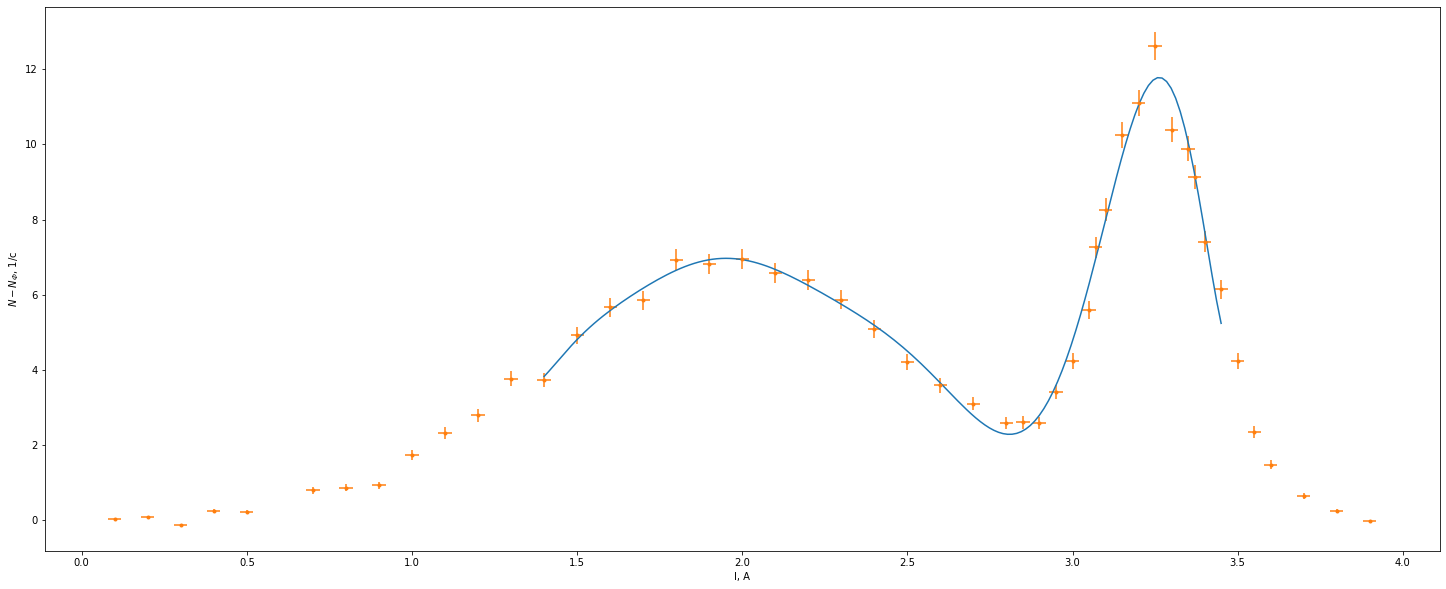

In [233]:
# Drawing from here
plt.figure(figsize=(25, 10))
plt.xlabel('I, A')
plt.ylabel('$N - N_{Ф}$, 1/c')

# Drawing trend line
fromIdx = 11
toIdx = 43
trend = np.poly1d(np.polyfit(I[fromIdx:toIdx], N_min_N_b[fromIdx:toIdx], 10))
xTrend = np.linspace(I[fromIdx+1], I[toIdx-2], num=150)
plt.plot(xTrend, trend(xTrend))

# Drawing error bars
ierr = [0.02] * len(I)
plt.errorbar(I, N_min_N_b, sigmaN_min_N_b, ierr, marker='.', ls='')


In [259]:
argmaxN_min_N_b = np.argmax(N_min_N_b) # 1/sec
pc = 1013.5 # kEv
c = 3e8
me = 9.1e-31

k = pc / (c * I[argmaxN_min_N_b])
k

1.0394871794871794e-06

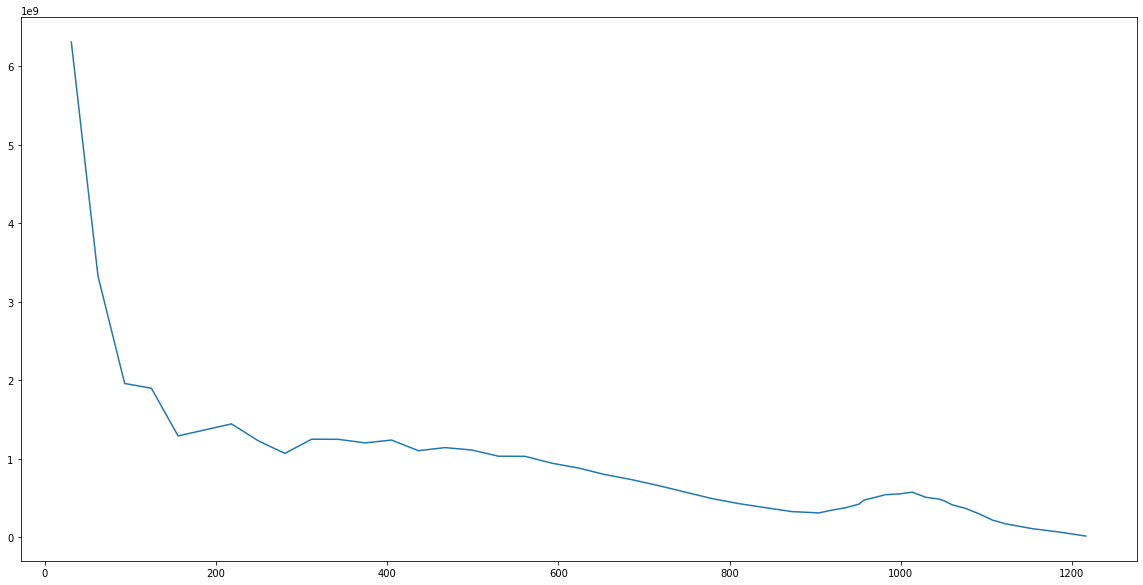

In [269]:
Ecalm = me * c**2 * 1.6 * 1e-19 / 1e3
E = np.sqrt((k * I * c)**2 + Ecalm**2) - Ecalm

yax = [np.sqrt(np.abs(N_min_N_b[i]) / (k * I[i])**3) for i in range(len(I))]

plt.figure(figsize=(20, 10))
plt.plot(E, yax)